In [1]:
import numpy as np
import os
import pandas as pd
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### 1. Load train and test data

In [2]:
train_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")

X_test = test_data.drop("Target", axis=1)
y_test = test_data["Target"].copy()

### 2. Dimensionality reduction using PCA

In [3]:
from sklearn.decomposition import PCA

In [4]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data['Target'])
labels = encoder.transform(train_data['Target'])
print('Encoded labels:', labels)

Encoded labels: [2 1 0 ... 2 2 2]


In [5]:
encoder.classes_ 

array(['GA', 'HO', 'LO', 'QMD'], dtype=object)

In [6]:
train_data['Target'] = labels

X_train = train_data.drop("Target", axis=1)
y_train = train_data["Target"].copy()

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

In [8]:
X_test_reduced = pca.transform(X_test)

In [9]:
X_reduced_df = pd.DataFrame(data=X_reduced)
y_train_df = pd.DataFrame(data=y_train)
y_train.reset_index(drop=True, inplace = True)
X_reduced_df["Target"] = y_train

In [10]:
X_test_reduced_df = pd.DataFrame(data=X_test_reduced)
y_test_df = pd.DataFrame(data=y_test)
y_test.reset_index(drop=True, inplace = True)
X_test_reduced_df["Target"] = y_test

In [11]:
# Save the PCA data
output_path_1 = 'data/train_data_PCA.csv'
output_path_2 = 'data/test_data_PCA.csv'

X_reduced_df.to_csv(output_path_1, index=False, header=False, mode='w')
X_test_reduced_df.to_csv(output_path_2, index=False, header=False, mode='w')

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_reduced)
X_test_scaled = StandardScaler().fit_transform(X_test_reduced)

Text(0, 0.5, 'PC2')

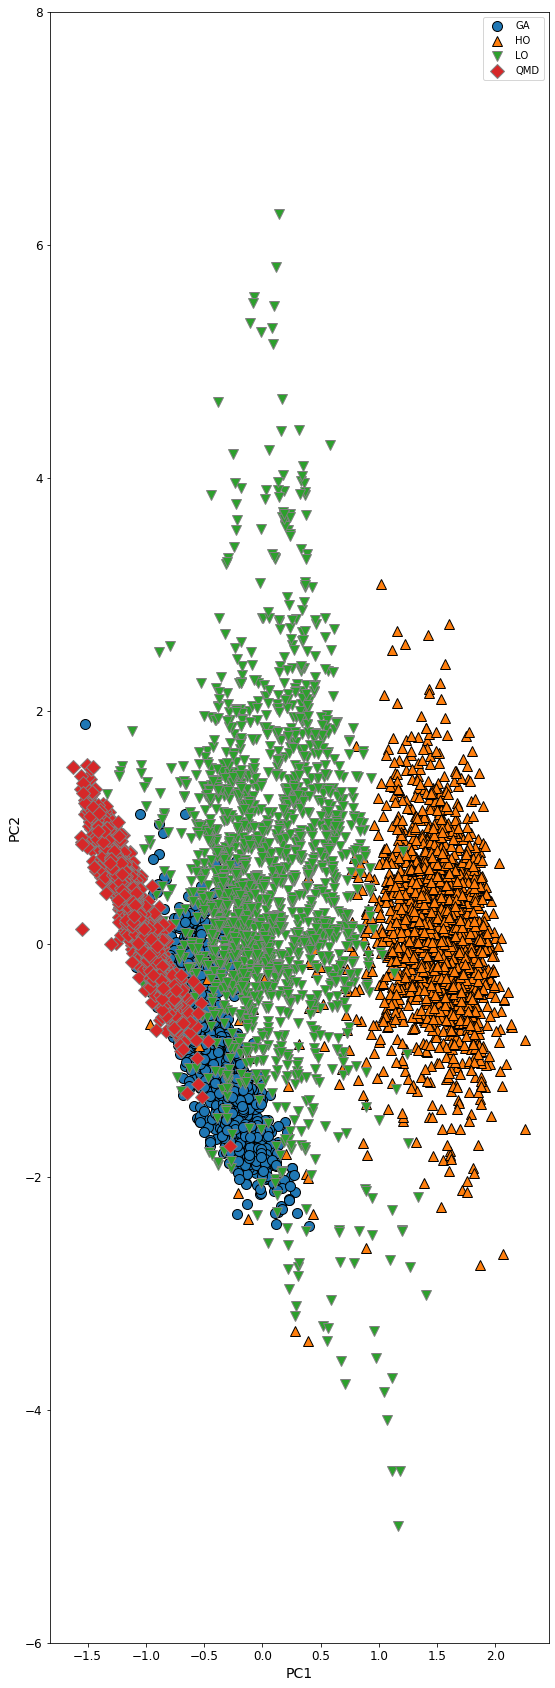

In [13]:
import mglearn

plt.figure(figsize=(10, 30))
mglearn.discrete_scatter(X_train_scaled[:,0], X_train_scaled[:,1], y_train)
plt.legend(["GA", "HO", "LO", "QMD"], loc="best")
plt.gca().set_aspect("equal")
plt.ylim(-6,8)\

plt.xlabel("PC1")
plt.ylabel("PC2")